<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Scheduling-and-Control-of-Queueing-Networks/blob/main/Queuing_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. ***기본모델***

## 1. M/M/1 모델 - 은행 창구 대기 시스템 예시

사례 설명:

* 고객은 평균적으로 3분마다 은행에 도착합니다.

* 창구 직원은 평균적으로 4분에 한 명의 고객을 처리할 수 있습니다.

In [ ]:
# M/M/1 모델 적용
import numpy as np

# 입력 변수
λ = 1 / 3  # 고객 도착률 (분당 평균 도착 횟수 = 1 / 평균 도착 간격)
μ = 1 / 4  # 서비스율 (분당 평균 서비스 횟수 = 1 / 평균 서비스 시간)

# 계산
ρ = λ / μ  # 시스템 이용률
L = λ / (μ - λ)  # 평균 시스템 내 고객 수
Lq = λ**2 / (μ * (μ - λ))  # 평균 대기 고객 수
W = 1 / (μ - λ)  # 평균 체류 시간
Wq = λ / (μ * (μ - λ))  # 평균 대기 시간


print("M/M/1 모델 예시 (은행 창구 대기 시스템)")
print(f"시스템 이용률 (ρ): {ρ:.2f}")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 대기 고객 수 (Lq): {Lq:.2f}")
print(f"평균 체류 시간 (W): {W:.2f}분")
print(f"평균 대기 시간 (Wq): {Wq:.2f}분")


M/M/1 모델 예시 (은행 창구 대기 시스템)
시스템 이용률 (ρ): 1.33
평균 시스템 내 고객 수 (L): -4.00
평균 대기 고객 수 (Lq): -5.33
평균 체류 시간 (W): -12.00분
평균 대기 시간 (Wq): -16.00분


## 2. M/M/c 모델 - 슈퍼마켓 계산대 대기 시스템 예시

사례 설명:

* 고객은 평균적으로 2분마다 슈퍼마켓에 도착합니다.

* 3개의 계산대가 있으며, 각 계산대는 평균적으로 5분에 한 명의 고객을 처리할 수 있습니다.

In [ ]:
# M/M/c 모델 적용
from math import factorial

# 입력 변수
λ = 1 / 2  # 고객 도착률 (분당 평균 도착 횟수)
μ = 1 / 5  # 서비스율 (분당 평균 서비스 횟수)
c = 3  # 서버의 수

# 시스템 이용률 계산
ρ = λ / (c * μ)

# P0 계산 (시스템이 비어 있는 확률)
P0_inv = sum([(λ / μ)**n / factorial(n) for n in range(c)]) + ((λ / μ)**c / (factorial(c) * (1 - ρ)))
P0 = 1 / P0_inv

# 평균 대기 고객 수 (Lq)
Lq = ((λ / μ)**c * ρ / (factorial(c) * (1 - ρ)**2)) * P0

# 평균 시스템 내 고객 수 (L)
L = Lq + λ / μ

# 평균 대기 시간 (Wq)
Wq = Lq / λ

# 평균 체류 시간 (W)
W = Wq + 1 / μ


print("\nM/M/c 모델 예시 (슈퍼마켓 계산대 대기 시스템)")
print(f"시스템 이용률 (ρ): {ρ:.2f}")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 대기 고객 수 (Lq): {Lq:.2f}")
print(f"평균 체류 시간 (W): {W:.2f}분")
print(f"평균 대기 시간 (Wq): {Wq:.2f}분")



M/M/c 모델 예시 (슈퍼마켓 계산대 대기 시스템)
시스템 이용률 (ρ): 0.83
평균 시스템 내 고객 수 (L): 6.01
평균 대기 고객 수 (Lq): 3.51
평균 체류 시간 (W): 12.02분
평균 대기 시간 (Wq): 7.02분


## 3. M/G/1 모델 - 콜센터 운영 예시

사례 설명:

* 평균적으로 1분마다 전화가 걸려옴 (λ = 1)

* 상담 시간의 평균은 4분이며, 분산은 2분^2 (서비스 시간이 일반 분포를 따름)

In [ ]:
# M/G/1 모델 적용
# 입력 변수
λ = 1  # 고객 도착률 (분당 평균 도착 횟수)
E_S = 4  # 평균 서비스 시간
Var_S = 2  # 서비스 시간 분산
μ = 1 / E_S  # 서비스율 (분당 평균 서비스 횟수)

# 시스템 이용률 계산
ρ = λ * E_S

# 서비스 시간의 제곱평균 계산
E_S2 = Var_S + E_S**2

# 평균 대기 고객 수 (Lq) 계산 (Pollaczek-Khinchine 공식)
Lq = (λ**2 * E_S2) / (2 * (1 - ρ))

# 평균 시스템 내 고객 수 (L)
L = Lq + ρ

# 평균 대기 시간 (Wq)
Wq = Lq / λ

# 평균 체류 시간 (W)
W = Wq + E_S


print("\nM/G/1 모델 예시 (콜센터 운영 시스템)")
print(f"시스템 이용률 (ρ): {ρ:.2f}")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 대기 고객 수 (Lq): {Lq:.2f}")
print(f"평균 체류 시간 (W): {W:.2f}분")
print(f"평균 대기 시간 (Wq): {Wq:.2f}분")



M/G/1 모델 예시 (콜센터 운영 시스템)
시스템 이용률 (ρ): 4.00
평균 시스템 내 고객 수 (L): 1.00
평균 대기 고객 수 (Lq): -3.00
평균 체류 시간 (W): 1.00분
평균 대기 시간 (Wq): -3.00분


# ***II. 특수한 상황하의 모델***

##1. M/M/∞ 모델 (무한 서버 모델)

고객은 즉시 서비스를 받을 수 있는 무한한 수의 서버가 있는 상황을 가정합니다.

In [ ]:
# M/M/∞ 모델
λ = 10  # 고객 도착률 (예: 시간당 10명 도착)
μ = 5   # 서비스율 (예: 한 서버당 시간당 5명의 고객 처리 가능)

# 평균 시스템 내 고객 수 (L) 및 평균 체류 시간 (W) 계산
L = λ / μ
W = 1 / μ

print("M/M/∞ 모델 결과")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 체류 시간 (W): {W:.2f} 시간")


M/M/∞ 모델 결과
평균 시스템 내 고객 수 (L): 2.00
평균 체류 시간 (W): 0.20 시간


##2. M/M/1/K 모델 (유한 대기 공간 모델)

대기 공간이 제한되어 있으며, 공간이 가득 찬 경우 고객은 서비스를 받지 않고 떠납니다.

In [ ]:
# M/M/1/K 모델
λ = 5   # 고객 도착률 (예: 시간당 5명 도착)
μ = 8   # 서비스율 (예: 시간당 8명의 고객 처리 가능)
K = 10  # 최대 대기 공간

# 시스템 이용률
ρ = λ / μ

# P0 계산 (시스템이 비어있는 확률)
P0 = (1 - ρ) / (1 - ρ**(K + 1))

# 평균 시스템 내 고객 수 (L) 계산
L = sum(n * (ρ**n) * P0 for n in range(K + 1))

# 평균 체류 시간 (W) 계산
W = L / λ if λ != 0 else 0

print("\nM/M/1/K 모델 결과")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 체류 시간 (W): {W:.2f} 시간")



M/M/1/K 모델 결과
평균 시스템 내 고객 수 (L): 1.60
평균 체류 시간 (W): 0.32 시간


##3. M/G/c 모델 (다중 서버 및 일반 서비스 시간 분포)

다수의 서버(c)와 일반 서비스 시간 분포를 가정합니다.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# M/G/c 모델
import numpy as np

λ = 10  # 고객 도착률 (시간당 10명 도착)
μ = 4   # 평균 서비스율 (시간당 4명 처리 가능)
c = 3   # 서버 수

# 시스템 이용률
ρ = λ / (c * μ)

# P0 계산
P0_inv = sum([(λ / μ)**n / np.math.factorial(n) for n in range(c)]) + ((λ / μ)**c / (np.math.factorial(c) * (1 - ρ)))
P0 = 1 / P0_inv

# 평균 대기 고객 수 (Lq) 계산
E_S2 = 1 / (μ**2)  # 서비스 시간의 분산을 단순화하여 계산
Lq = (P0 * ((λ / μ)**c) * ρ) / (np.math.factorial(c) * ((1 - ρ)**2))

# 평균 시스템 내 고객 수 (L)
L = Lq + λ / μ

# 평균 대기 시간 (Wq) 및 체류 시간 (W)
Wq = Lq / λ
W = Wq + 1 / μ

print("\nM/G/c 모델 결과")
print(f"평균 대기 고객 수 (Lq): {Lq:.2f}")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 대기 시간 (Wq): {Wq:.2f} 시간")
print(f"평균 체류 시간 (W): {W:.2f} 시간")



M/G/c 모델 결과
평균 대기 고객 수 (Lq): 3.51
평균 시스템 내 고객 수 (L): 6.01
평균 대기 시간 (Wq): 0.35 시간
평균 체류 시간 (W): 0.60 시간


## 4. G/G/1 모델 (일반 도착 및 서비스 분포, 단일 서버)

도착 시간과 서비스 시간이 일반 분포를 따르며, 분석이 어렵지만 간단한 시뮬레이션을 통해 추정할 수 있습니다.

In [ ]:
import random

# G/G/1 모델 시뮬레이션
λ = 5  # 평균 도착률 (시간당 5명 도착)
μ = 6  # 평균 서비스율 (시간당 6명 처리 가능)
num_customers = 1000  # 시뮬레이션할 고객 수

arrival_times = [random.expovariate(λ) for _ in range(num_customers)]
service_times = [random.expovariate(μ) for _ in range(num_customers)]

waiting_times = []
current_time = 0
queue = []

for arrival, service in zip(arrival_times, service_times):
    while queue and queue[0] <= current_time:
        queue.pop(0)

    queue.append(current_time + service)
    waiting_times.append(max(0, current_time - arrival))
    current_time += service

average_waiting_time = sum(waiting_times) / len(waiting_times)

print("\nG/G/1 모델 시뮬레이션 결과")
print(f"평균 대기 시간 (Wq): {average_waiting_time:.2f} 시간")



G/G/1 모델 시뮬레이션 결과
평균 대기 시간 (Wq): 85.07 시간


## 5. 우선순위 큐 모델 (Priority Queue Model)

고객에게 우선순위를 부여하여 서비스 순서를 정하는 모델입니다.

In [ ]:
from queue import PriorityQueue

# 우선순위 큐 모델
pq = PriorityQueue()

# 5명의 고객의 도착 시간과 우선순위를 시뮬레이션
customers = [(2, '고객 1'), (5, '고객 2'), (1, '고객 3'), (4, '고객 4'), (3, '고객 5')]

# 우선순위 큐에 삽입
for priority, customer in customers:
    pq.put((priority, customer))

print("\n우선순위 큐 모델 결과 (낮은 숫자가 높은 우선순위)")
while not pq.empty():
    print(pq.get())



우선순위 큐 모델 결과 (낮은 숫자가 높은 우선순위)
(1, '고객 3')
(2, '고객 1')
(3, '고객 5')
(4, '고객 4')
(5, '고객 2')


##6. M/Ek/1 모델 (Erlang 서비스 분포)

이 모델은 서비스 시간이 여러 단계로 구성된 Erlang 분포를 따르는 경우를 모델링합니다.

서비스 시간이 k개의 지수 분포의 합으로 이루어져 있기 때문에 일반적인 M/M/1 모델에 비해 보다 현실적인 서비스 시간 분포를 가질 수 있습니다.

In [ ]:
import numpy as np

# M/Ek/1 모델
λ = 5   # 고객 도착률 (시간당 5명)
μ = 3   # 서비스율 (시간당 3명)
k = 4   # Erlang 분포의 단계 수

# 시스템 이용률
ρ = λ / μ

# 평균 대기 고객 수 (Lq) 계산
Lq = (ρ**2) / (2 * (1 - ρ)) * (1 + (1 / k))

# 평균 시스템 내 고객 수 (L)
L = Lq + ρ

# 평균 대기 시간 (Wq) 및 체류 시간 (W)
Wq = Lq / λ
W = Wq + 1 / μ

print("\nM/Ek/1 모델 결과")
print(f"평균 대기 고객 수 (Lq): {Lq:.2f}")
print(f"평균 시스템 내 고객 수 (L): {L:.2f}")
print(f"평균 대기 시간 (Wq): {Wq:.2f} 시간")
print(f"평균 체류 시간 (W): {W:.2f} 시간")



M/Ek/1 모델 결과
평균 대기 고객 수 (Lq): -2.60
평균 시스템 내 고객 수 (L): -0.94
평균 대기 시간 (Wq): -0.52 시간
평균 체류 시간 (W): -0.19 시간


##7. Balking, Reneging, 그리고 Jockeying을 고려한 모델

Balking: 고객이 대기열이 너무 길다고 판단하여 아예 줄 서지 않고 떠나는 경우.

Reneging: 대기 중에 기다리다 지치거나 이유로 대기열을 떠나는 경우.

Jockeying: 고객이 더 빠른 줄로 이동하는 경우.

In [ ]:
import random

# Balking, Reneging, Jockeying 모델
max_queue_length = 5  # 고객이 대기열의 길이가 5 이상이면 떠나는 현상(Balking)
reneging_probability = 0.2  # 대기 중에 고객이 떠날 확률
servers = 2  # 두 개의 서비스 창구를 가진 시스템

# 시뮬레이션을 위한 고객 도착
customers = [{'arrival_time': i, 'wait_time': 0, 'line': random.choice([1, 2])} for i in range(1, 20)]

queue1 = []
queue2 = []

for customer in customers:
    # Balking 현상: 대기열의 길이가 최대치를 넘으면 떠난다
    if len(queue1) > max_queue_length and customer['line'] == 1:
        print(f"Customer {customer['arrival_time']} balked at line 1")
        continue
    elif len(queue2) > max_queue_length and customer['line'] == 2:
        print(f"Customer {customer['arrival_time']} balked at line 2")
        continue

    # Reneging 현상: 대기 중에 일정 확률로 떠남
    if random.random() < reneging_probability:
        print(f"Customer {customer['arrival_time']} reneged from line {customer['line']}")
        continue

    # Jockeying 현상: 짧은 대기열로 이동
    if customer['line'] == 1 and len(queue1) > len(queue2):
        print(f"Customer {customer['arrival_time']} jockeyed to line 2")
        queue2.append(customer)
    elif customer['line'] == 2 and len(queue2) > len(queue1):
        print(f"Customer {customer['arrival_time']} jockeyed to line 1")
        queue1.append(customer)
    else:
        if customer['line'] == 1:
            queue1.append(customer)
        else:
            queue2.append(customer)

print(f"\nLine 1 has {len(queue1)} customers, Line 2 has {len(queue2)} customers")


Customer 2 jockeyed to line 1
Customer 6 jockeyed to line 1
Customer 7 reneged from line 2
Customer 12 reneged from line 2
Customer 14 balked at line 1
Customer 15 reneged from line 2
Customer 17 balked at line 1
Customer 18 balked at line 1
Customer 19 balked at line 1

Line 1 has 6 customers, Line 2 has 6 customers


##8. Network of Queues (대기행렬 네트워크)

이 모델은 여러 개의 대기열이 연결되어 있는 시스템으로, 한 대기열에서 다른 대기열로 이동하는 구조를 시뮬레이션합니다.

In [ ]:
# Network of Queues
import random

# 각 대기열의 처리율
service_rates = [5, 4, 6]  # 세 개의 대기열이 있으며, 각각의 처리율

# 고객 도착 및 대기열 이동
num_customers = 100
arrival_times = [random.expovariate(1) for _ in range(num_customers)]
queues = [0, 0, 0]  # 각 대기열에 있는 고객 수

for arrival in arrival_times:
    # 첫 번째 대기열에 고객 추가
    queues[0] += 1

    # 각 대기열에서 다음 대기열로 이동하는 경우
    for i in range(len(queues) - 1):
        if queues[i] > 0:
            move_probability = min(1, service_rates[i] / service_rates[i+1])
            if random.random() < move_probability:
                queues[i] -= 1
                queues[i + 1] += 1

print("\nNetwork of Queues 결과")
print(f"첫 번째 대기열 고객 수: {queues[0]}")
print(f"두 번째 대기열 고객 수: {queues[1]}")
print(f"세 번째 대기열 고객 수: {queues[2]}")



Network of Queues 결과
첫 번째 대기열 고객 수: 0
두 번째 대기열 고객 수: 30
세 번째 대기열 고객 수: 70


##9. Fluid Model (유체 모델)

고객을 개별적으로 다루는 것이 아닌 연속적인 "유체"처럼 취급하여, 고객의 흐름을 계산합니다.

이를 위해 파이썬에서는 연속적인 시간 흐름에 따른 변화량을 계산합니다.

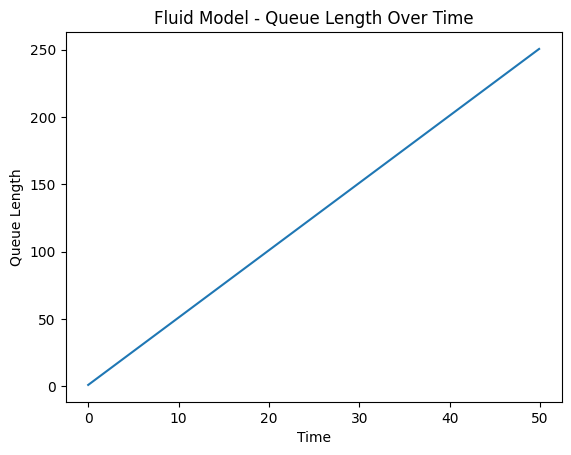

In [ ]:
# Fluid Model
import matplotlib.pyplot as plt

λ = 10  # 평균 도착률 (시간당 10명)
μ = 5   # 평균 서비스율 (시간당 5명)
initial_customers = 0  # 초기 대기열에 있는 고객 수
time_steps = 50  # 시뮬레이션 시간 간격
dt = 0.1  # 시간 증분

queue_length = initial_customers
queue_lengths = []

# 시간에 따른 고객 흐름 계산
for t in range(int(time_steps / dt)):
    arrival_rate = λ * dt
    service_rate = min(queue_length, μ * dt)  # 처리할 수 있는 최대 고객 수

    queue_length += arrival_rate - service_rate
    queue_lengths.append(queue_length)

plt.plot([dt * i for i in range(len(queue_lengths))], queue_lengths)
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title('Fluid Model - Queue Length Over Time')
plt.show()
